In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [15]:
from sklearn.datasets import load_wine

##### loading the dataset as a pandas dataframe

In [16]:
d= load_wine()

In [27]:
d.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [17]:
df= pd.DataFrame(d.data, columns=d.feature_names)

In [18]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
df["target"]= d.target

In [26]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##### checking the shape of our dataframe

In [29]:
df.shape

(178, 14)

##### checking the data types of the dataframe

In [30]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

##### checking for nan values

In [28]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

##### here above we can see the variations of different features with respect to the target variable (0,1,2).

###### data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F55E03C880>,
      dtype=object)

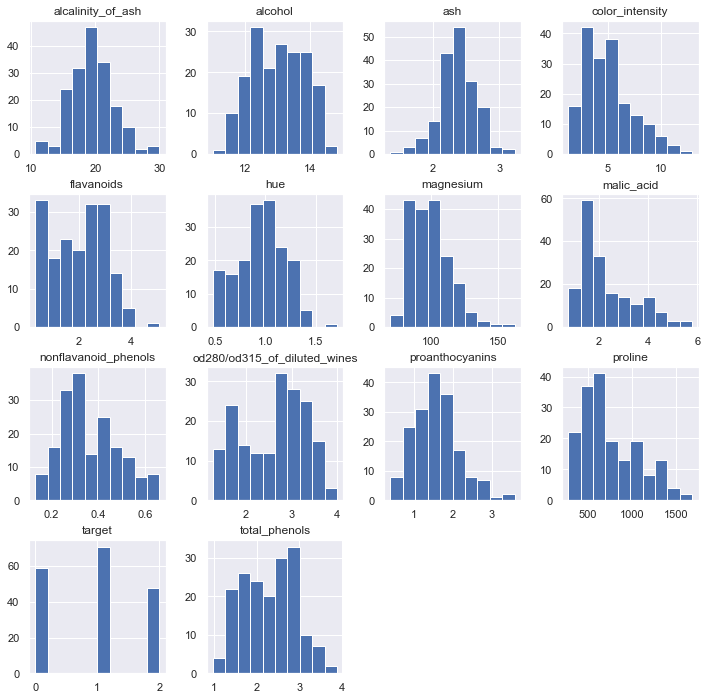

In [95]:
df.hist(figsize=(12,12))

##### here above we can see the distribution of each and every feature and with the help of this we can conclude that there are outliers present in many features that needs to be removed

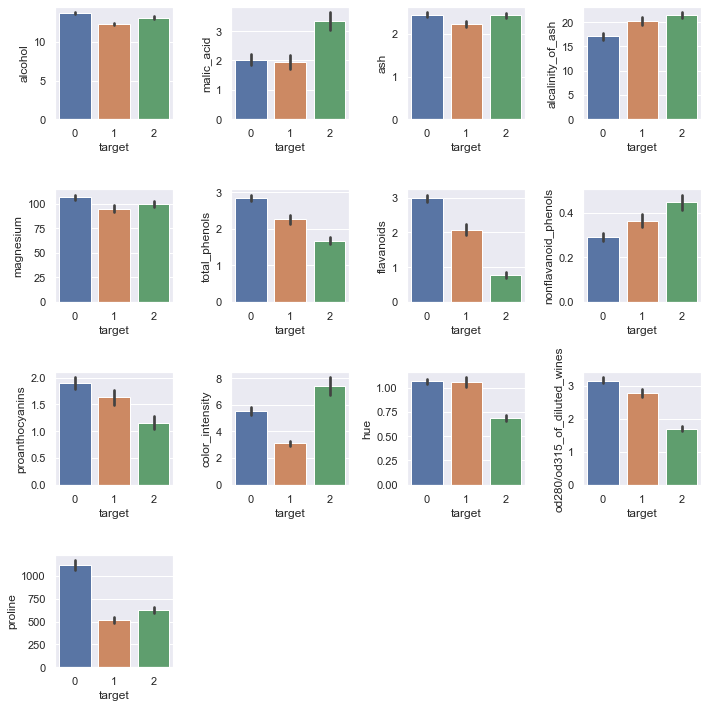

In [114]:
plt.figure(figsize=(10,10))

plt.subplot(4,4,1)
sns.barplot(x="target",y="alcohol", data=df)

plt.subplot(4,4,2)
sns.barplot(x="target", y="malic_acid", data=df)

plt.subplot(4,4,3)
sns.barplot(x="target", y= "ash", data=df)

plt.subplot(4,4,4)
sns.barplot(x="target",y="alcalinity_of_ash", data=df)

plt.subplot(4,4,5)
sns.barplot(x="target", y="magnesium", data=df)

plt.subplot(4,4,6)
sns.barplot(x="target", y="total_phenols", data=df)

plt.subplot(4,4,7)
sns.barplot(x="target", y="flavanoids", data=df)

plt.subplot(4,4,8)
sns.barplot(x="target", y="nonflavanoid_phenols", data=df)

plt.subplot(4,4,9)
sns.barplot(x="target",y="proanthocyanins", data=df)

plt.subplot(4,4,10)
sns.barplot(x="target",y="color_intensity", data=df)

plt.subplot(4,4,11)
sns.barplot(x="target",y="hue", data=df)

plt.subplot(4,4,12)
sns.barplot(x="target",y="od280/od315_of_diluted_wines", data=df)

plt.subplot(4,4,13)
sns.barplot(x="target",y="proline", data=df)


plt.tight_layout()

##### here we can see the variation of different features with respect to the target

###### removing outliers using z score

In [116]:
from scipy import stats

In [117]:
z = np.abs(stats.zscore(df))
print(z)

[[1.51861254 0.5622498  0.23205254 ... 1.84791957 1.01300893 1.21394365]
 [0.24628963 0.49941338 0.82799632 ... 1.1134493  0.96524152 1.21394365]
 [0.19687903 0.02123125 1.10933436 ... 0.78858745 1.39514818 1.21394365]
 ...
 [0.33275817 1.74474449 0.38935541 ... 1.48544548 0.28057537 1.37386437]
 [0.20923168 0.22769377 0.01273209 ... 1.40069891 0.29649784 1.37386437]
 [1.39508604 1.58316512 1.36520822 ... 1.42894777 0.59516041 1.37386437]]


In [118]:
threshold = 3
print(np.where(z > 3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 2,  2,  4,  3,  4,  8, 10,  2,  6,  1,  9], dtype=int64))


In [119]:
df_new_1 = df[(z < 3).all(axis=1)]

In [120]:
df_new_1.shape

(168, 14)

In [121]:
X= df_new_1.drop("target", axis=1)
y= df_new_1.target

In [122]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [123]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

##### selecting the top 5 features based on correlation feature selection

In [124]:
X_new= np.array(X)
y_new= np.array(y)

In [125]:
c= np.array([])
for i in range(X_new.shape[1]):
    fi= X_new[:,i]
    ci= fi.dot(y) / ((fi.dot(fi)*y.dot(y))**0.5)
    c= np.hstack((c,ci))

In [126]:
c_abs= np.abs(c)

In [127]:
c_abs

array([0.74917059, 0.81988268, 0.75788502, 0.81343283, 0.73919257,
       0.60881823, 0.43671404, 0.82918512, 0.60398416, 0.76657903,
       0.65080904, 0.60039707, 0.54250573])

In [128]:
idx= np.argsort(c_abs)[::-1][:5]

In [129]:
FNames= np.asarray(df.columns)

In [130]:
FNames[idx]

array(['nonflavanoid_phenols', 'malic_acid', 'alcalinity_of_ash',
       'color_intensity', 'ash'], dtype=object)

##### above are the columns which we will be using for our prediction

In [131]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [132]:
X= X.drop(["alcohol","magnesium","total_phenols","flavanoids","proanthocyanins",
          "hue","od280/od315_of_diluted_wines","proline"], axis=1)

In [133]:
X.head()

,malic_acid,ash,alcalinity_of_ash,nonflavanoid_phenols,color_intensity
0,1.71,2.43,15.6,0.28,5.64
1,1.78,2.14,11.2,0.26,4.38
2,2.36,2.67,18.6,0.30,5.68
3,1.95,2.50,16.8,0.24,7.80
4,2.59,2.87,21.0,0.39,4.32


In [134]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [136]:
X_train, X_test, y_train,  y_test= train_test_split(X,y,test_size=0.3, random_state=123)

In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
NB= GaussianNB()

In [139]:
NB.fit(X_train,y_train)

GaussianNB()

In [140]:
y_pred= NB.predict(X_test)

In [146]:
NB.score(X_test,y_test), NB.score(X_train,y_train)

(0.803921568627451, 0.9316239316239316)

In [144]:
cm=confusion_matrix(y_test,y_pred)

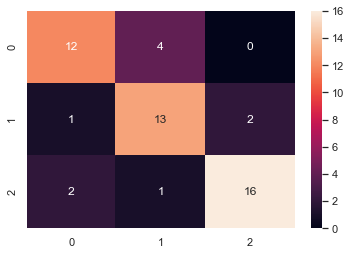

In [145]:
sns.heatmap(cm, annot=True)

#####  Saving the model as a pickle file for serialization

In [147]:
import joblib

In [149]:
joblib.dump(NB, 'wine_prediction.pkl')

['wine_prediction.pkl']

##### Here we will not be using multinomial naive bayes as the features are not of discrete type